# Milestone 1 - EDA and Preprocessing data 

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaing the data
- Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR) 
- Observe duplicate data
- Observe outliers
- After observing outliers,missing data and duplicates, handle any unclean data.
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
- Add a new column named 'Week number' and discretisize the data into weeks according to the dates.Tip: Change the datatype of the date feature to datetime type instead of object.
- Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
- Identify feature(s) which need normalisation and show your reasoning.Then choose a technique to normalise the feature(s) and comment on why you chose this technique.
- Add atleast two more columns which adds more info to the dataset by evaluating specific feature(s). I.E( Column indicating whether the accident was on a weekend or not). 
- For any imputation with arbitrary values or encoding done, you have to store what the value imputed or encoded represents in a new csv file. I.e if you impute a missing value with -1 or 100 you must have a csv file illustrating what -1 and 100 means. Or for instance, if you encode cities with 1,2,3,4,etc what each number represents must be shown in the new csv file.
- Load the new dataset into a csv file.
- **Extremely Important note** - Your code should be as generic as possible and not hard-coded and be able to work with various datasets. Any hard-coded solutions will be severely penalised.
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# 1 - Extraction

Required Libraries for EDA:

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

We set an option to see all columns values of the data

In [2]:
pd.set_option('display.max_columns', None)

Load the dataset:

In [3]:
df = pd.read_csv("2016_Accidents_UK.csv", low_memory=False)

# 2- EDA

Showing the first 5 rows of the dataset:

In [4]:
df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,Metropolitan Police,Slight,2,1,01/11/2016,Tuesday,02:30,Brent,Brent,Brent,A,4006,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights unlit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000543
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,Metropolitan Police,Slight,1,1,01/11/2016,Tuesday,00:37,Bexley,Bexley,Bexley,A,207,Single carriageway,30.0,Other junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000375
2,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,Metropolitan Police,Slight,1,1,01/11/2016,Tuesday,01:25,Hillingdon,Hillingdon,Hillingdon,A,4020,Roundabout,30.0,Roundabout,Give way or uncontrolled,A,4020.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01033725
3,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,Metropolitan Police,Slight,1,1,01/11/2016,Tuesday,09:15,Merton,Merton,Merton,A,217,Single carriageway,30.0,T or staggered junction,Auto traffic signal,A,217.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003379
4,2016010000018,2016,010000018,510740.0,177230.0,-0.406580,51.483139,Metropolitan Police,Slight,2,1,01/11/2016,Tuesday,07:53,Hounslow,Hounslow,Hounslow,A,312,Dual carriageway,40.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002583


Getting the size of the dataset:

In [5]:
df.shape

(136621, 36)

Showing statistics that summarize the central tendency of the variables:

In [6]:
df.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit
count,136621.0,136614.000000,1.366140e+05,136614.000000,136614.000000,136621.000000,136621.000000,136584.000000
mean,2016.0,448699.363169,2.883354e+05,-1.304881,52.482399,1.848179,1.327644,37.943683
std,0.0,95230.253169,1.570588e+05,1.398947,1.414390,0.710117,0.789296,14.041669
min,2016.0,76702.000000,1.107500e+04,-7.389809,49.919716,1.000000,1.000000,20.000000
25%,2016.0,386355.750000,1.764248e+05,-2.204357,51.473779,1.000000,1.000000,30.000000
50%,2016.0,454126.000000,2.374855e+05,-1.201205,52.025165,2.000000,1.000000,30.000000
75%,2016.0,527660.000000,3.897438e+05,-0.159708,53.401675,2.000000,1.000000,40.000000
max,2016.0,655256.000000,1.178623e+06,1.757858,60.490191,16.000000,58.000000,70.000000


Getting a short summary of our dataset:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136621 entries, 0 to 136620
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               136621 non-null  object 
 1   accident_year                                136621 non-null  int64  
 2   accident_reference                           136621 non-null  object 
 3   location_easting_osgr                        136614 non-null  float64
 4   location_northing_osgr                       136614 non-null  float64
 5   longitude                                    136614 non-null  float64
 6   latitude                                     136614 non-null  float64
 7   police_force                                 136621 non-null  object 
 8   accident_severity                            136621 non-null  object 
 9   number_of_vehicles                           136621 non-nul

Checking if there are any duplicated rows in the dataset:

In [8]:
df.duplicated().sum()

0

Study of relationships between variables:

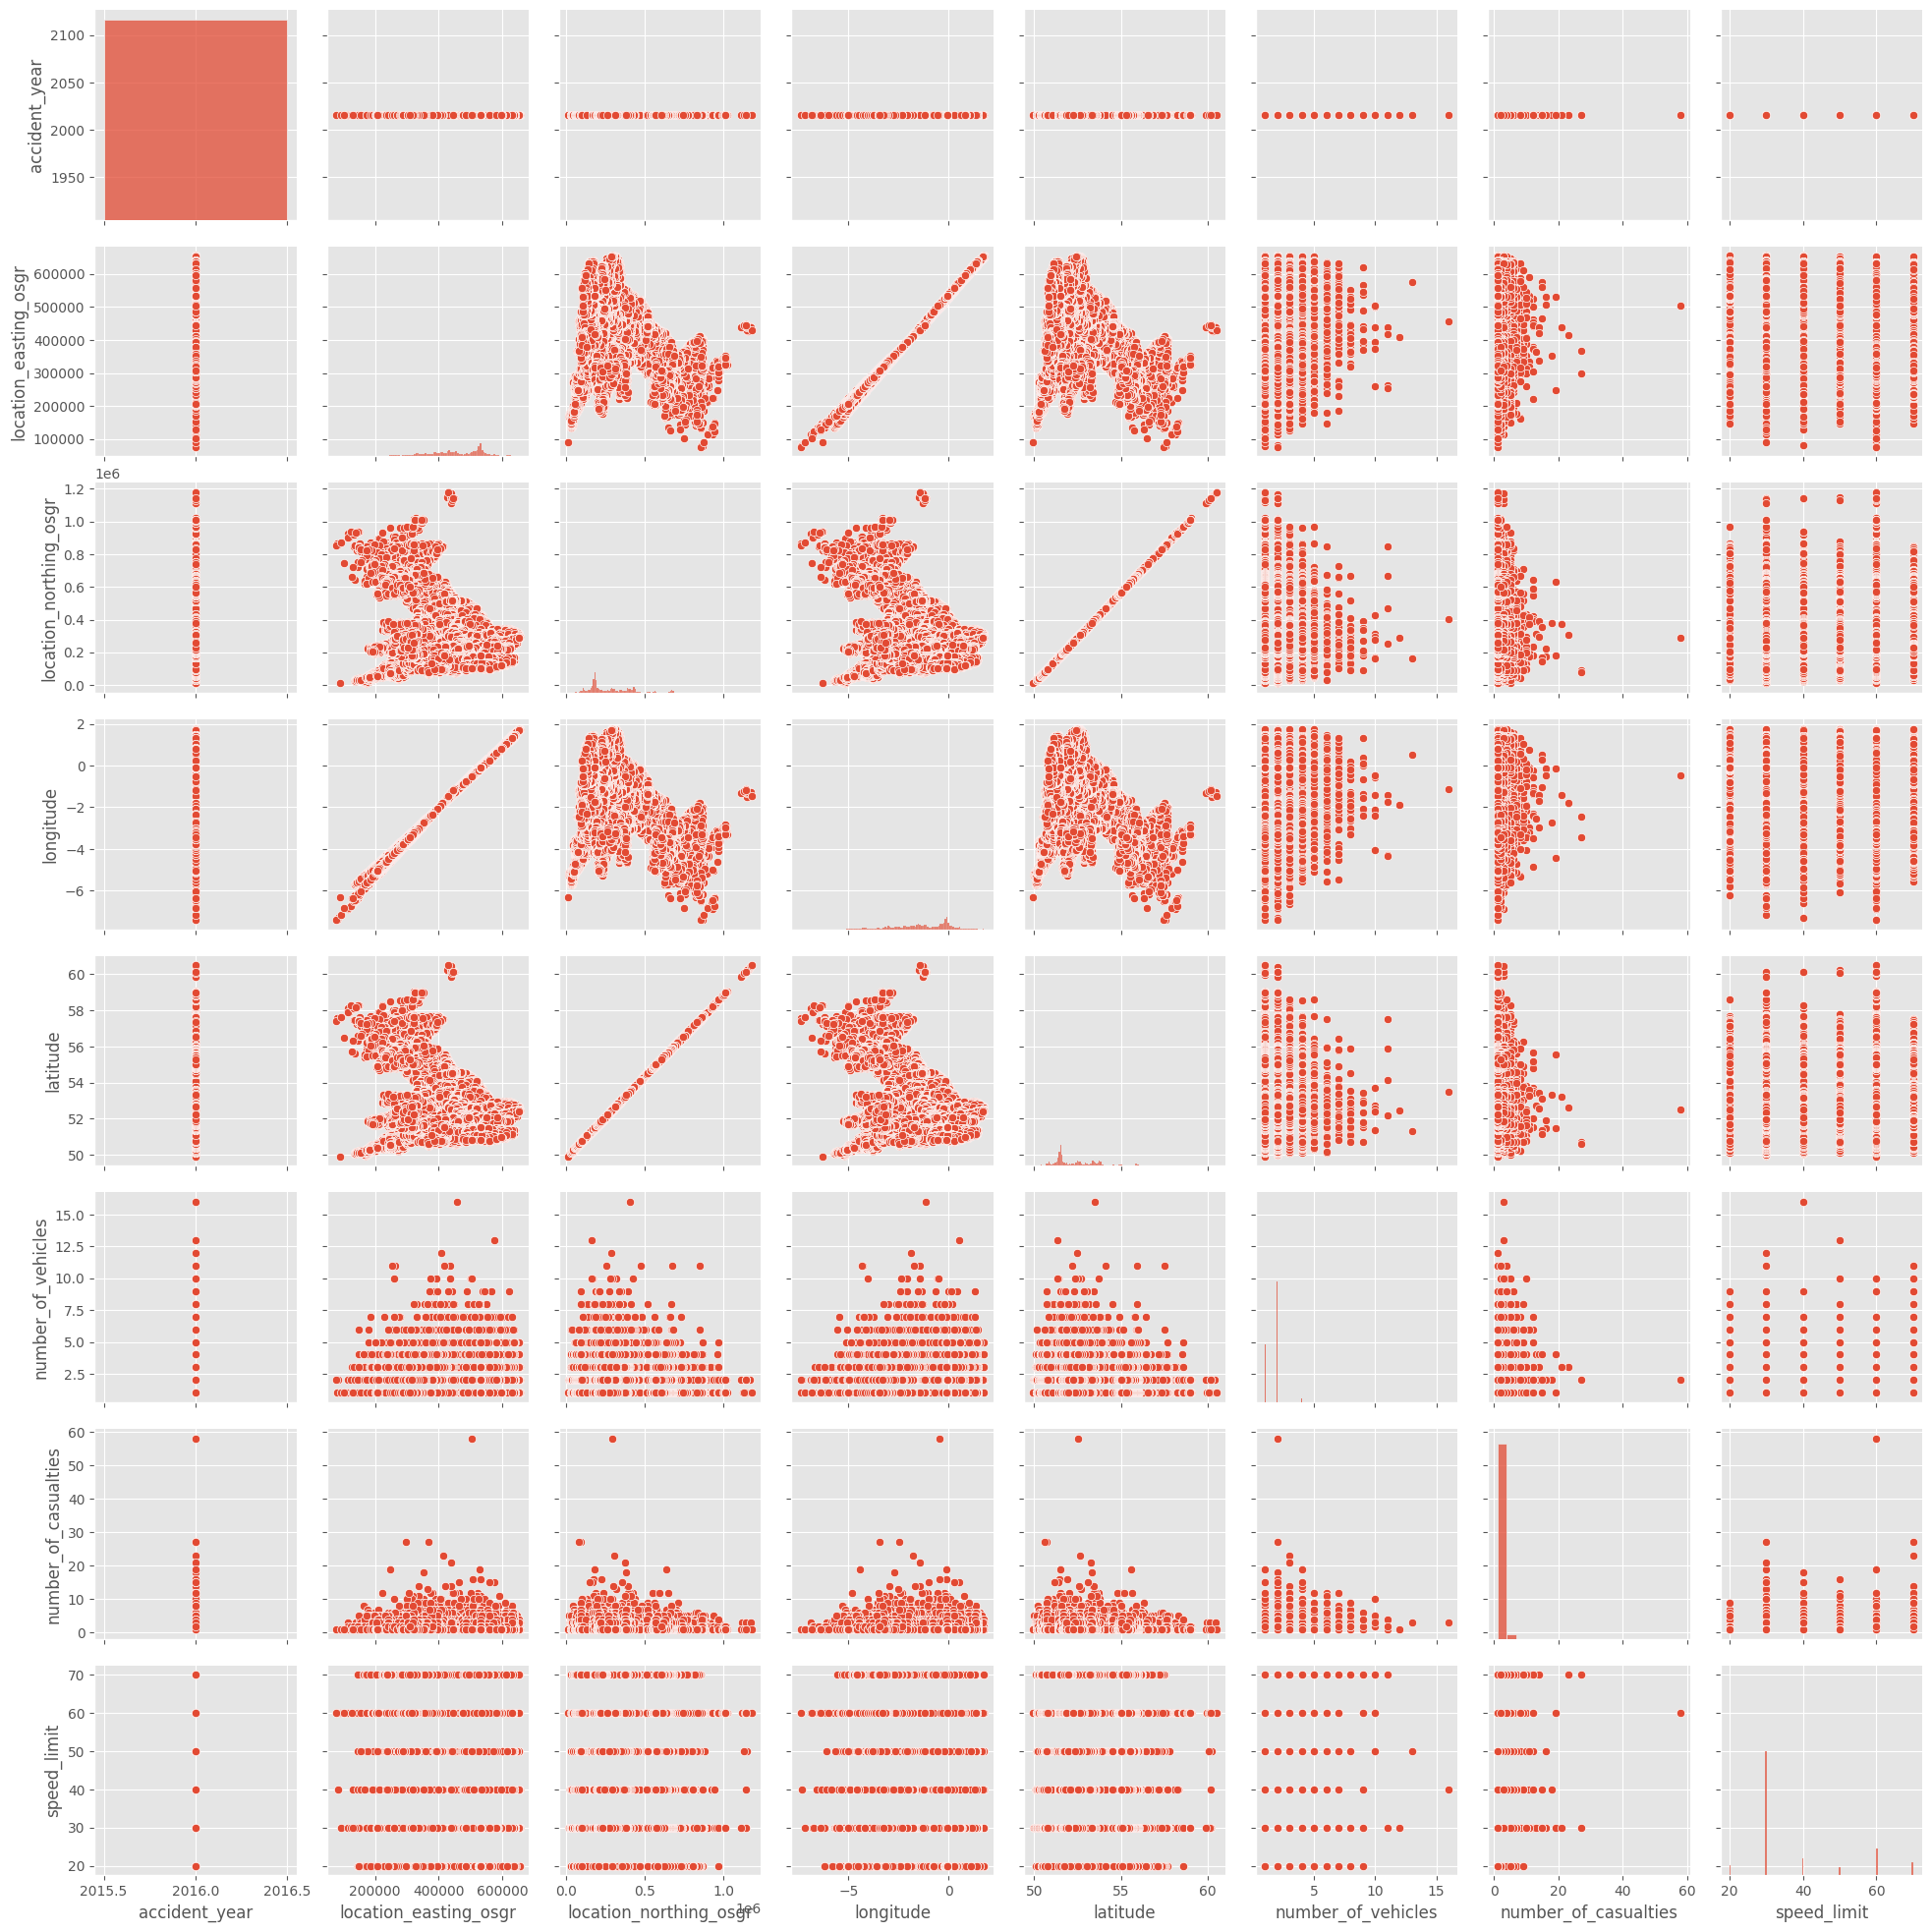

In [9]:
sns.pairplot(df)

Knowing which variables are strongly correlated with each other:

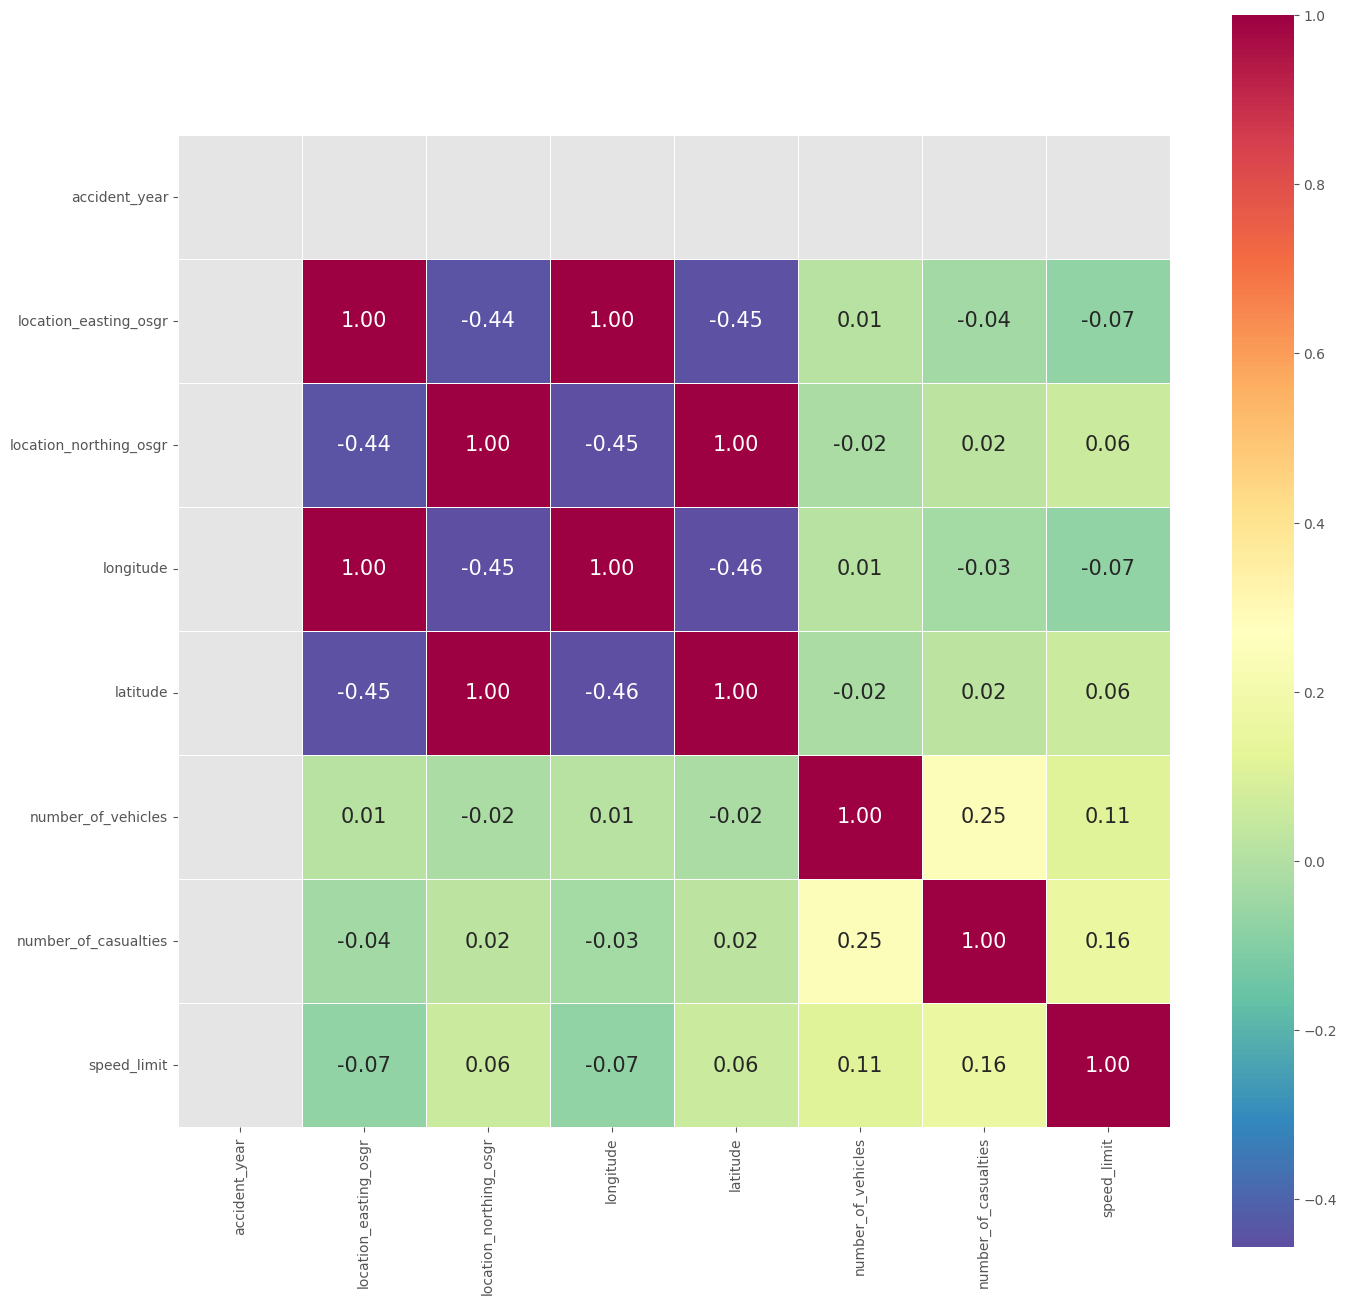

In [10]:
corrmat = df.corr(numeric_only = True)
plt.figure(figsize = (16,16))
hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 linewidths=0.5,
                 annot_kws={'size': 15},
                 cmap="Spectral_r")
plt.show()

## Observations:

1- The dataset contains the data of accidents.
2- The number of accidents in the dataset is 136621 each of them has an index and another 35 piece of information that describe the accident.
3- All the accidents in the dataset happened in 2016.
4- At least one vehicle got affected in each accident and at most 16 vehicle got affected.
5- At least one casualty in each accident and at most 58 ones.
6- speed limit of vehicles in the accidents goes from 20 to 70.
7- Some of columns cotain null values which are (location_easting_osgr, location_northing_osgr, longitude, latitude, speed_limit, second_road_number, weather_conditions).
8- The information about second_road_number is missing alot in the dataset.
9- There are no duplicated rows in the dataset.
10- location_easting_osgr and longitude are very correlated to each other.
11- location_northing_osgr and latitude are very correlated to each other.
12- number_of_vehicles and number_of_casualties are strongly positive correlated.
13- speed_limit and number_of_casualties are strongly positive correlated.

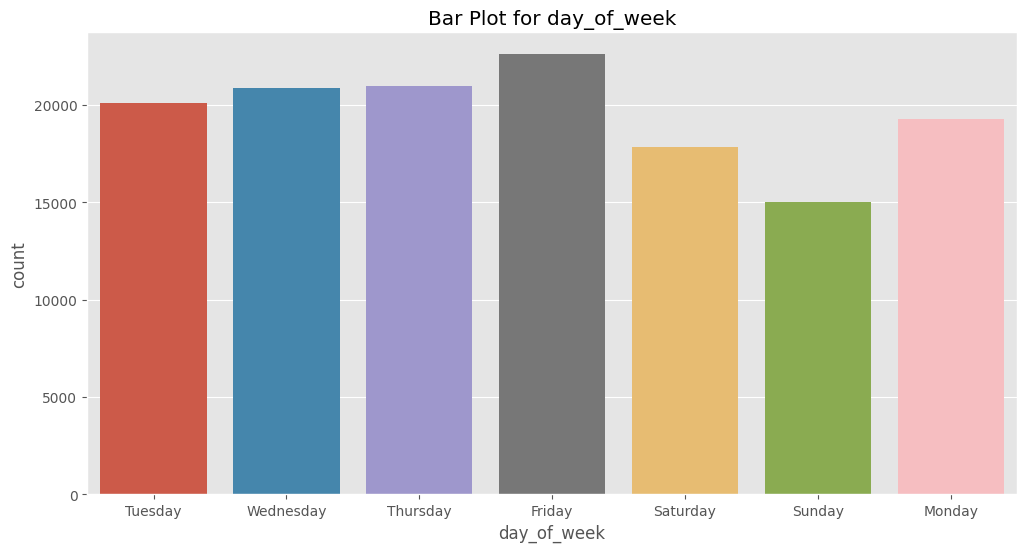

In [11]:
sns.countplot(data=df, x="day_of_week")
plt.title('Bar Plot for day_of_week')
plt.show()

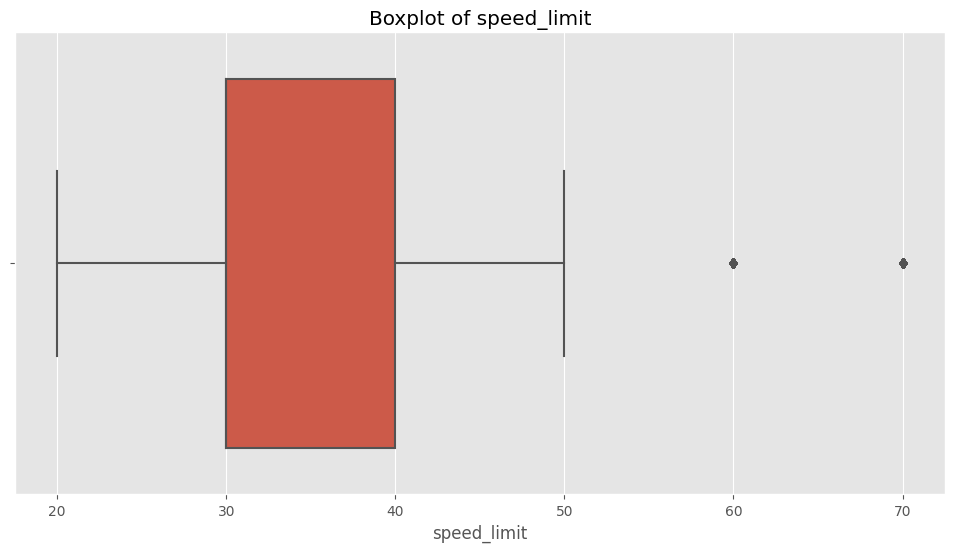

In [12]:
sns.boxplot(x='speed_limit', data=df)
plt.title('Boxplot of speed_limit')
plt.show()

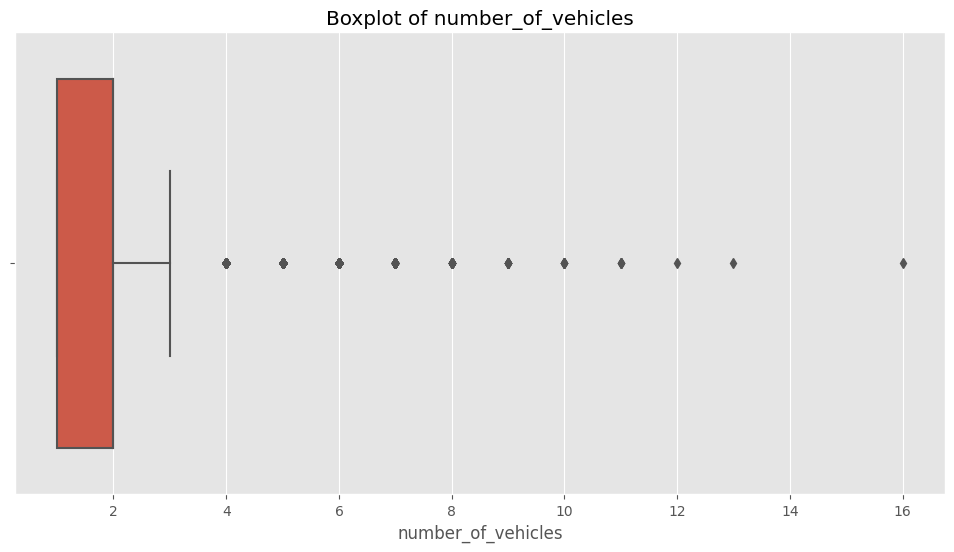

In [13]:
sns.boxplot(x='number_of_vehicles', data=df)
plt.title('Boxplot of number_of_vehicles')
plt.show()

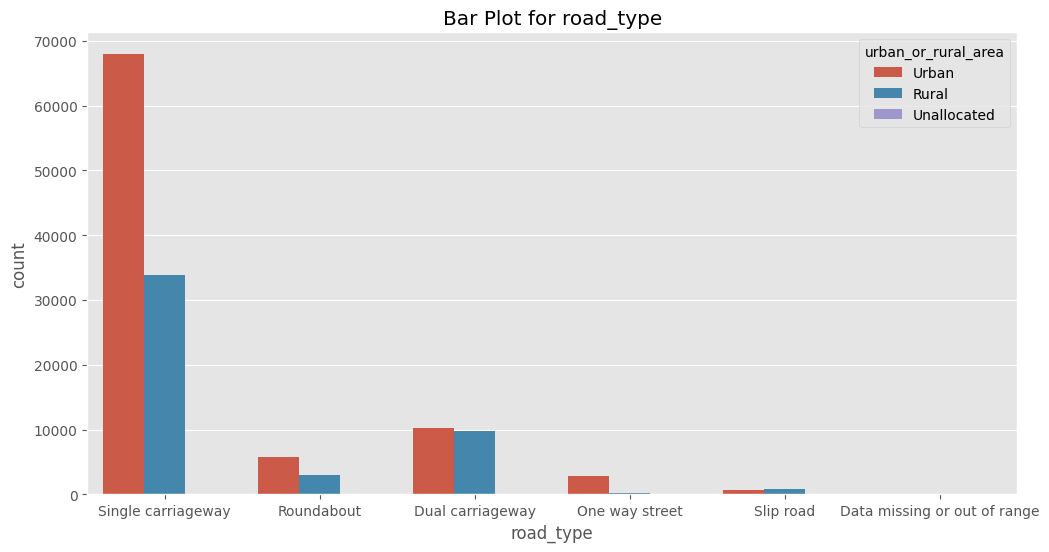

In [14]:
sns.countplot(data=df, x="road_type", hue="urban_or_rural_area")
plt.title('Bar Plot for road_type')
plt.show()

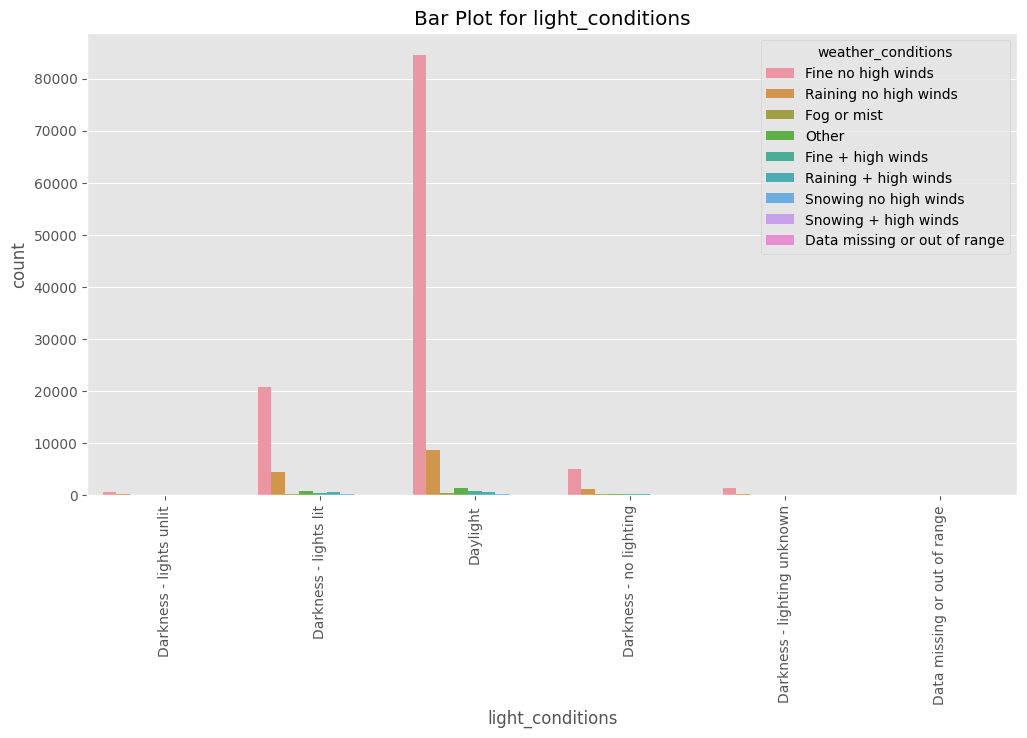

In [15]:
sns.countplot(data=df, x="light_conditions", hue="weather_conditions")
plt.title('Bar Plot for light_conditions')
plt.xticks(rotation ='vertical')
plt.show()

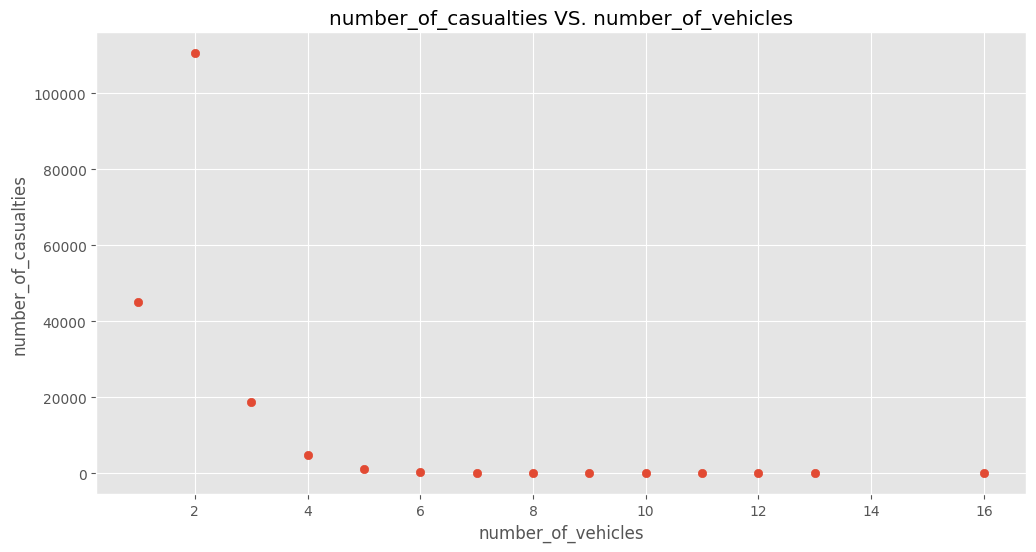

In [16]:
count_of_casualties = df.groupby(['number_of_vehicles'])['number_of_casualties'].sum()
plt.xlabel('number_of_vehicles')
plt.ylabel('number_of_casualties')
plt.title('number_of_casualties VS. number_of_vehicles')
plt.scatter(count_of_casualties.index,count_of_casualties)
plt.show()

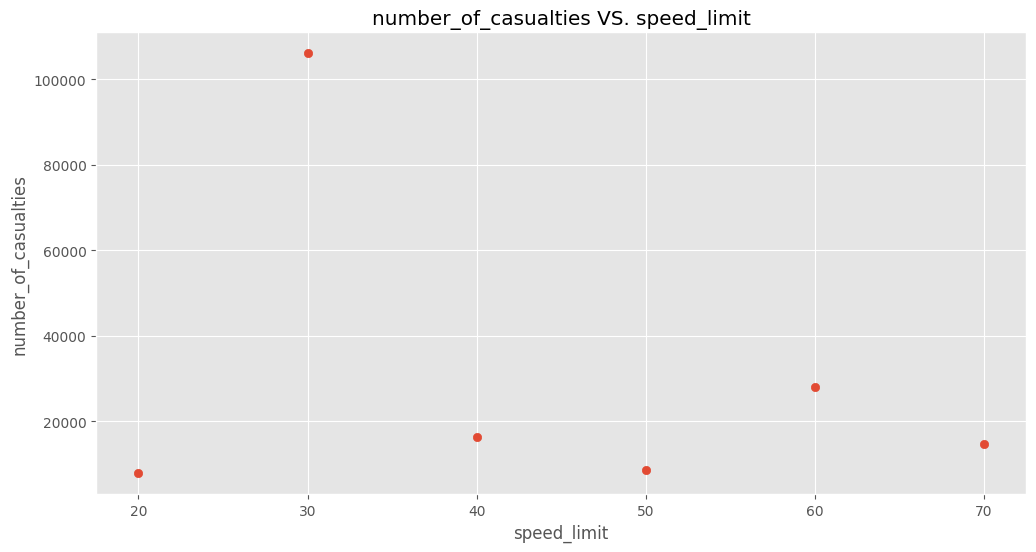

In [17]:
count_of_casualties = df.groupby(['speed_limit'])['number_of_casualties'].sum()
plt.xlabel('speed_limit')
plt.ylabel('number_of_casualties')
plt.title('number_of_casualties VS. speed_limit')
plt.scatter(count_of_casualties.index,count_of_casualties)
plt.show()

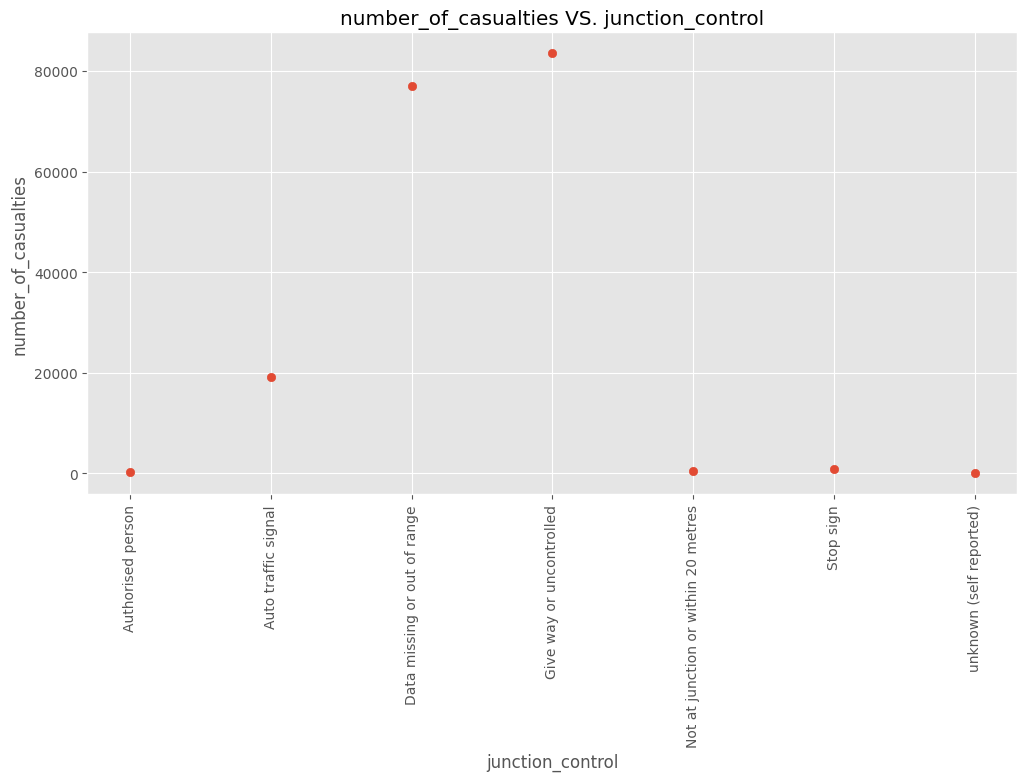

In [18]:
count_of_casualties = df.groupby(['junction_control'])['number_of_casualties'].sum()
plt.xlabel('junction_control')
plt.ylabel('number_of_casualties')
plt.title('number_of_casualties VS. junction_control')
plt.xticks(rotation ='vertical')
plt.scatter(count_of_casualties.index,count_of_casualties)
plt.show()

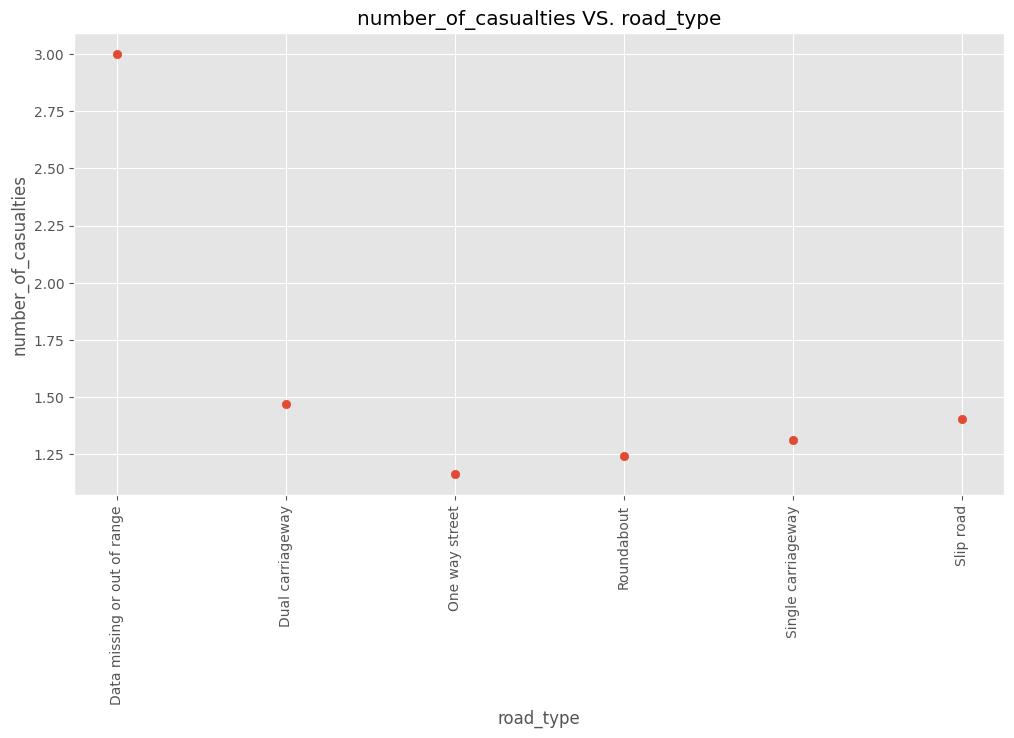

In [19]:
region_average = df.groupby(['road_type'])['number_of_casualties'].sum() / df.groupby(['road_type'])['number_of_casualties'].count()
plt.xlabel('road_type')
plt.ylabel('number_of_casualties')
plt.title('number_of_casualties VS. road_type')
plt.xticks(rotation ='vertical')
plt.scatter(region_average.index,region_average)
plt.show()

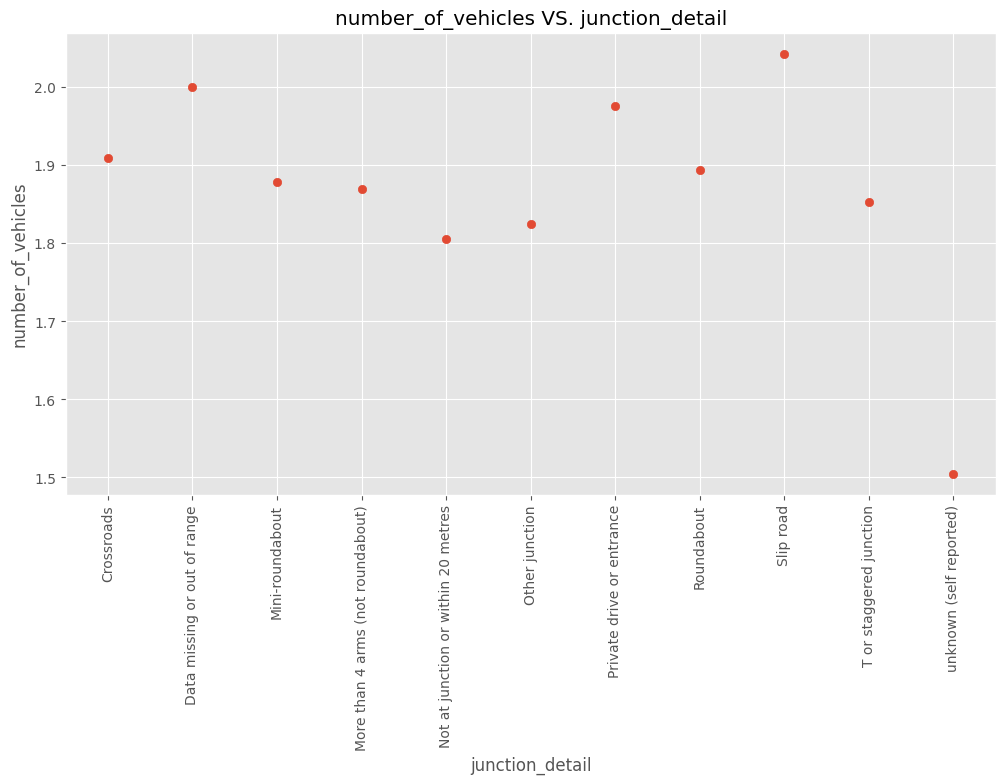

In [20]:
region_average = df.groupby(['junction_detail'])['number_of_vehicles'].sum() / df.groupby(['junction_detail'])['number_of_vehicles'].count()
plt.xlabel('junction_detail')
plt.ylabel('number_of_vehicles')
plt.title('number_of_vehicles VS. junction_detail')
plt.xticks(rotation ='vertical')
plt.scatter(region_average.index,region_average)
plt.show()

# 3 - Cleaning Data

## Observing missing Data

Let's look at how many null values we have in the dataset

In [21]:
def get_nan_count(dataset: pd.DataFrame, percentage=False, nan_word=None):
    if(nan_word == None):
        null_cnt = dataset.isnull().sum()
    else:
        null_cnt = (dataset == nan_word).sum()
    null_cnt = null_cnt[null_cnt > 0]
    if(percentage):
        null_cnt = null_cnt * 100 / len(dataset)
    return null_cnt

dataset = df
get_nan_count(dataset), get_nan_count(dataset, percentage=True)

(location_easting_osgr         7
 location_northing_osgr        7
 longitude                     7
 latitude                      7
 road_type                  1399
 speed_limit                  37
 second_road_number        57007
 weather_conditions         3813
 dtype: int64,
 location_easting_osgr      0.005124
 location_northing_osgr     0.005124
 longitude                  0.005124
 latitude                   0.005124
 road_type                  1.024001
 speed_limit                0.027082
 second_road_number        41.726382
 weather_conditions         2.790933
 dtype: float64)

### Missing location values

For location columns [location_easting_osgr, location_northing_osgr, longitude, latitude] we have 7 missing records, let's look at them

In [22]:
dataset[dataset['longitude'].isna()]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
62592,2016210125234,2016,210125234,NaN,NaN,NaN,NaN,Staffordshire,Serious,2,1,07/11/2016,Monday,06:00,Stafford,Stafford,Staffordshire,Unclassified,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Unallocated,Yes,Non-trunk,-1
62618,2016210126357,2016,210126357,NaN,NaN,NaN,NaN,Staffordshire,Slight,1,1,10/11/2016,Thursday,16:40,Stoke-on-Trent,Stoke-on-Trent,Stoke-on-Trent,A,5272,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,None,None,Unallocated,Yes,Non-trunk,-1
83330,2016400135181,2016,400135181,NaN,NaN,NaN,NaN,Bedfordshire,Slight,3,3,28/11/2016,Monday,07:55,Bedford,Bedford,Bedford,B,645,Single carriageway,60.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Unallocated,Yes,Non-trunk,-1
129439,2016930000146,2016,930000146,NaN,NaN,NaN,NaN,Tayside,Slight,1,1,24/04/2016,Sunday,15:43,Perth and Kinross,Perth and Kinross,Perth and Kinross,A,9,Single carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Unallocated,Yes,Data missing or out of range,-1
132298,2016961600599,2016,961600599,NaN,NaN,NaN,NaN,Central,Slight,2,3,15/04/2016,Friday,13:30,Stirling,Stirling,Stirling,A,872,Data missing or out of range,60.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,Data missing or out of range,Data missing or out of range,Data missing or out of range,Data missing or out of range,Data missing or out of range,None,Data missing or out of range,Unallocated,No,Data missing or out of range,-1
132431,2016961601188,2016,961601188,NaN,NaN,NaN,NaN,Central,Serious,2,1,03/08/2016,Wednesday,08:54,Stirling,Stirling,Stirling,A,81,Single carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,None,None,Unallocated,Yes,Data missing or out of range,-1
132527,2016961601508,2016,961601508,NaN,NaN,NaN,NaN,Central,Slight,1,1,26/09/2016,Monday,08:40,Stirling,Stirling,Stirling,A,820,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Unallocated,No,Data missing or out of range,-1


Looking at these data, there's no common pattern or explanation between theses records. The missing data for location is MCAR.

### Missing road type values

Let's look at the road type different values and their count

Values count of road type
Single carriageway              101687
Dual carriageway                 20117
Roundabout                        8865
One way street                    3117
Slip road                         1435
NaN                               1399
Data missing or out of range         1
Name: road_type, dtype: int64


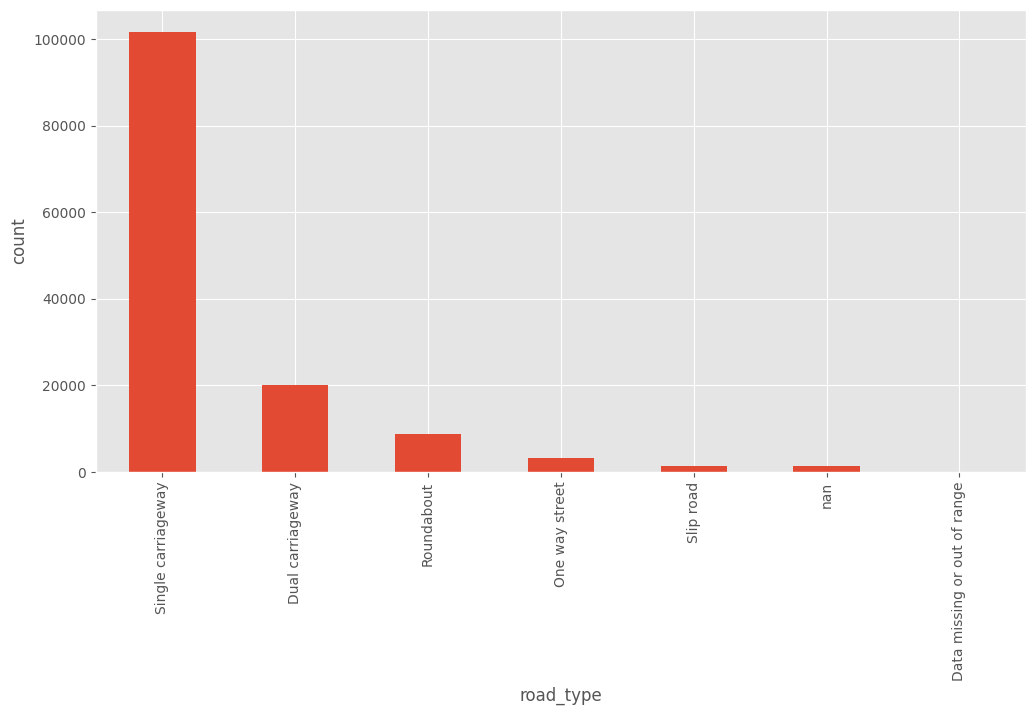

In [23]:
def visualize_cols_values_cnt(dataset, col_name, percentage=False, title=None):
    (dataset[col_name].value_counts(dropna=False) * ((100/len(dataset)) if percentage else 1) ).plot(kind='bar', xlabel=col_name, ylabel='count', title=title)
    

print('Values count of road type')
print(dataset['road_type'].value_counts(dropna=False))
visualize_cols_values_cnt(dataset, 'road_type')


Let's look at the road type missing values and there relation to the road class

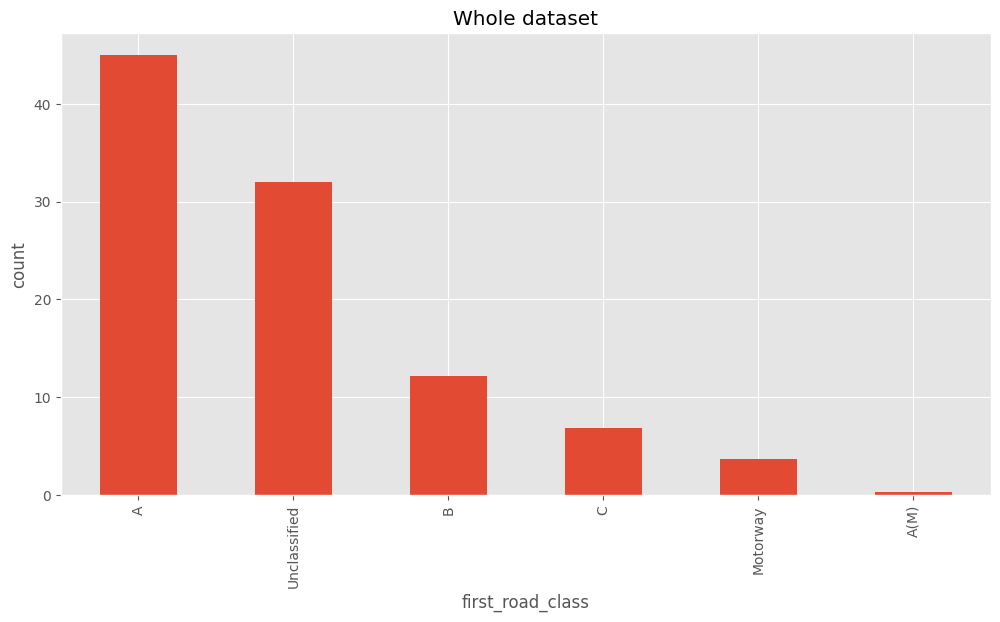

In [24]:
road_null_ds = dataset[dataset['road_type'].isna()]
visualize_cols_values_cnt(dataset, 'first_road_class', percentage=True, title="Whole dataset")

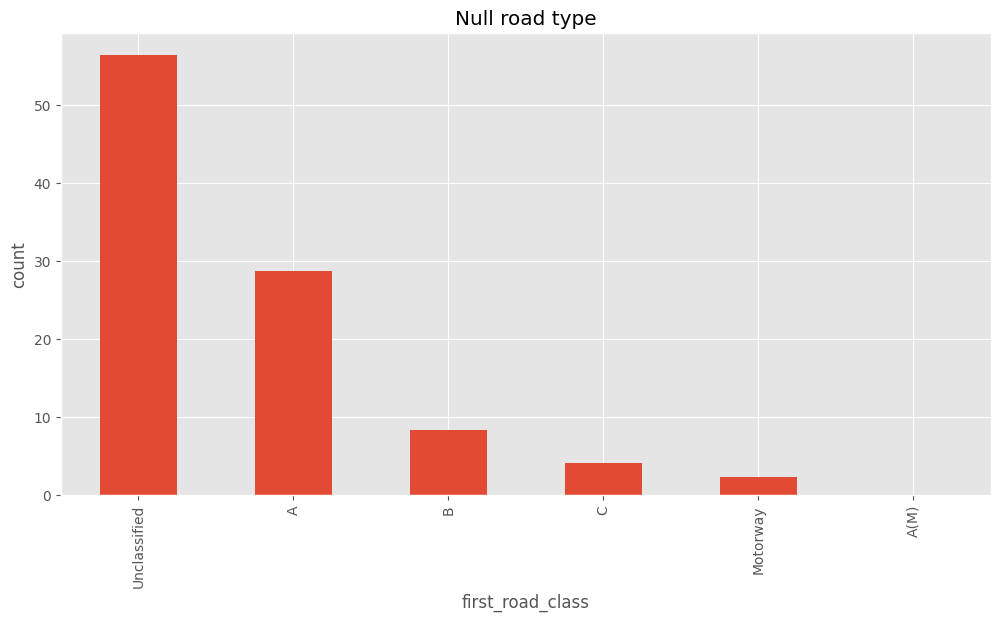

In [25]:
visualize_cols_values_cnt(road_null_ds, 'first_road_class', percentage=True, title="Null road type")

We can see that the percentage of unclassified roads in the missing data is higher than in the total data. This suggests that there might be a correlation between the road class being unclassified and its type to be missing. 
It's only 1% of the data and we should not worry much about it.

### Missing speed values

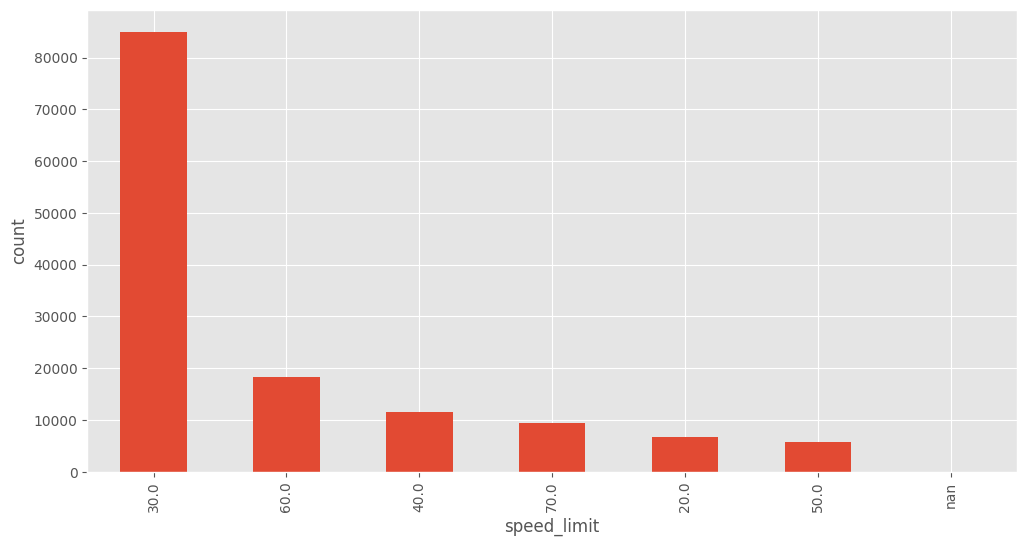

In [26]:
visualize_cols_values_cnt(dataset, 'speed_limit')

There might be a relation between the speed limit being missing and the road class.

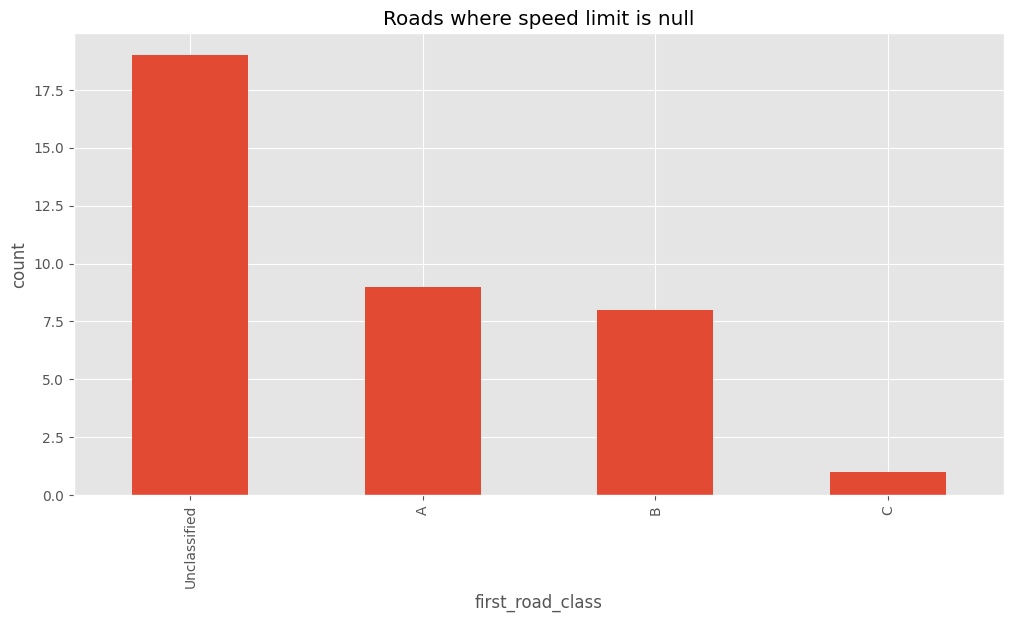

In [52]:
visualize_cols_values_cnt(dataset[dataset.speed_limit.isna()], 'first_road_class', title="Roads where speed limit is null")

There are only 37 missing values for speed limit and most of these roads are unclassified so it might the reason that the speed limit is missing.

### Missing second road values

42% of the records have this feature missing which is a very big number. It can be explained by the fact that most of the accidents happen at only one road and not a crosswalk.

Let's look at the junction type values distribution to understand why all these values are missing.

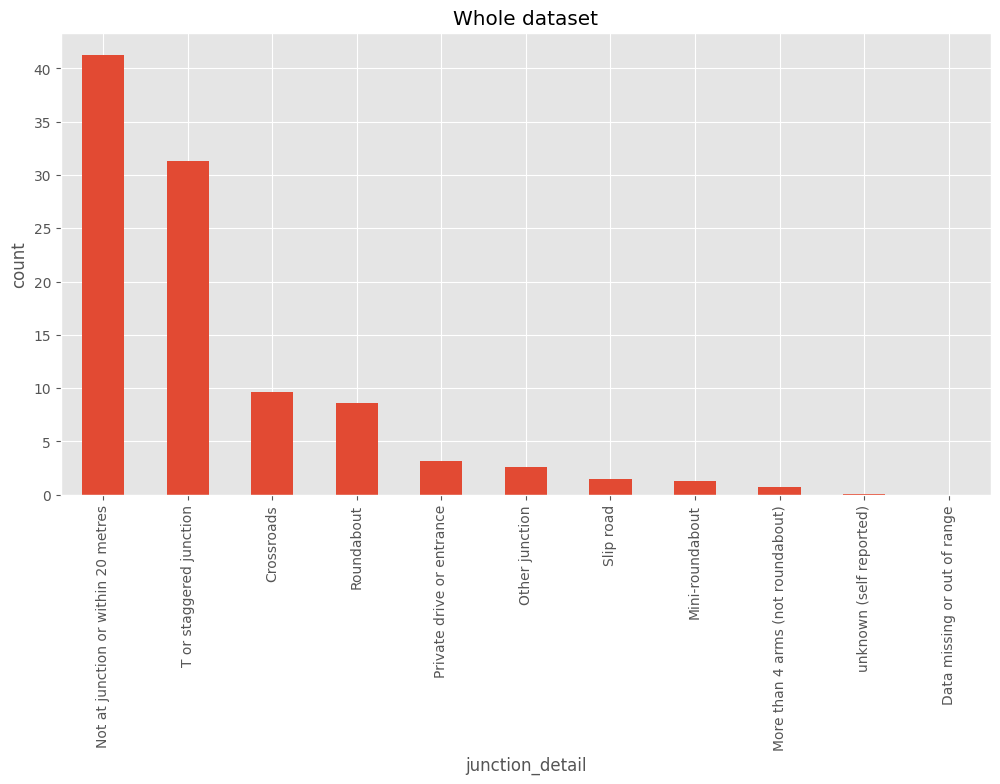

In [28]:
visualize_cols_values_cnt(dataset, 'junction_detail', percentage=True, title="Whole dataset")

The "Not a junction" value occurs around 42% of the dataset which is the same percentage as missing second road. This might be the reason for it to be missing.

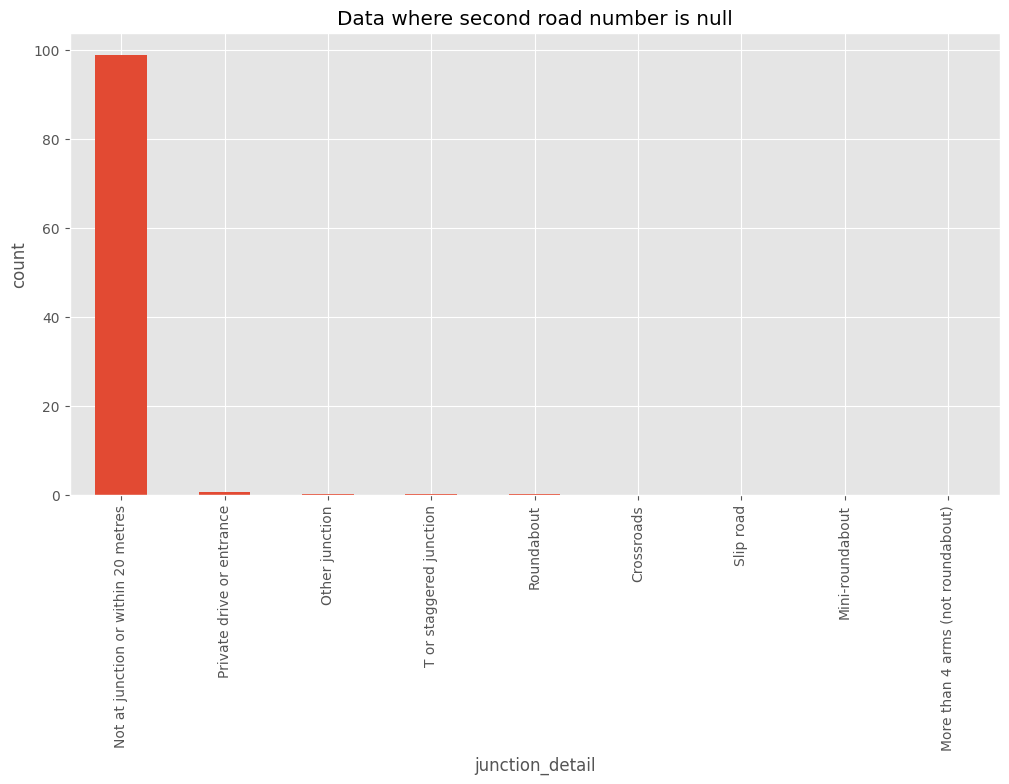

In [53]:

ds_null_2nd_road = dataset[dataset.second_road_number.isna()]
visualize_cols_values_cnt( ds_null_2nd_road, 'junction_detail', percentage=True,  title="Data where second road number is null")


From the above 2 charts we can see that almost 100% of the null values are coming from accidents happened not at a junction. This means that there's no second road at the first place. This is Missing At Random (MAR) type.   

### Missing weather condition values

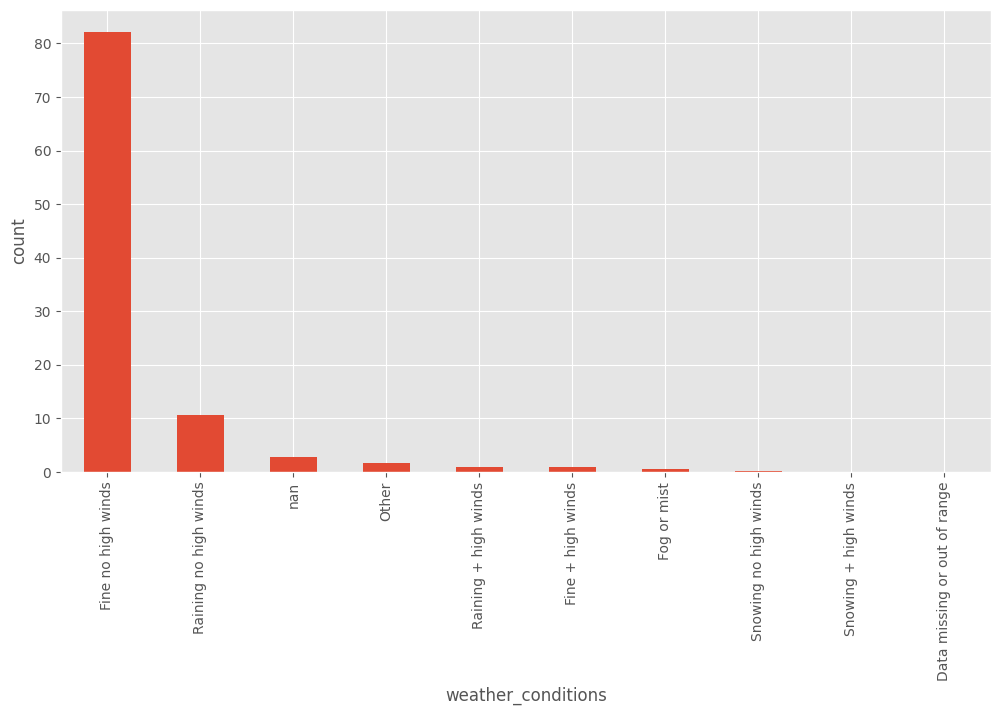

In [30]:
visualize_cols_values_cnt(dataset, 'weather_conditions', percentage=True)

Because this is weather data. It might be justified that the weather was not reported during some accidents. It can be treated under the category of "Data missing or out of range".

### Observing that "Data missing or out of range" is userd instead of NaN

Some of the values are set to the value 'Data missing or out of range' instead of NaN

In [31]:
nan_word = 'Data missing or out of range'
get_nan_count(dataset, percentage=True, nan_word=nan_word)

road_type                                   0.000732
junction_detail                             0.000732
junction_control                           41.443848
pedestrian_crossing_human_control           0.131019
pedestrian_crossing_physical_facilities     0.122236
light_conditions                            0.009515
weather_conditions                          0.009515
road_surface_conditions                     0.558479
carriageway_hazards                         0.075391
trunk_road_flag                             9.711538
dtype: float64

Let's look at the junction control because it has 41% missing values. It looks like it has the same issue as the second road missing values when there's no junction.

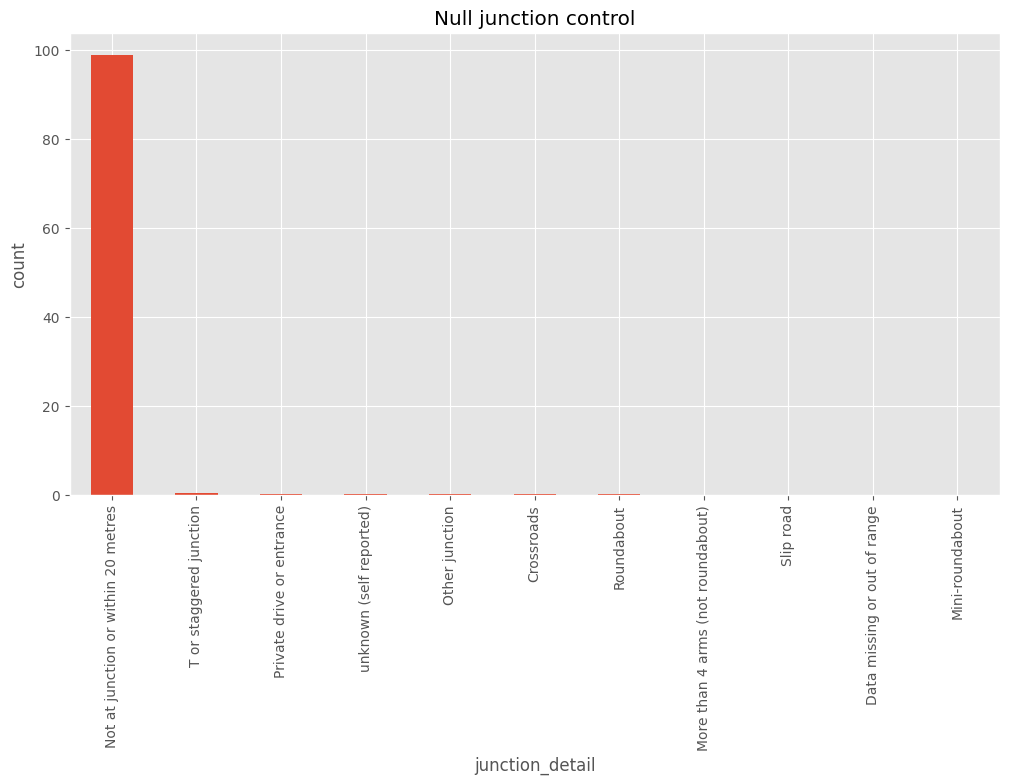

In [32]:
ds_null_junction_cont = dataset[dataset.junction_control == nan_word]
visualize_cols_values_cnt( ds_null_junction_cont, 'junction_detail', percentage=True,  title="Null junction control")

This confirms our hypothesis since most of the missing values happens when there are no junctions which means there is no junction control. This is MAR.

Let's look at trunk_road_flag which has %10 missing

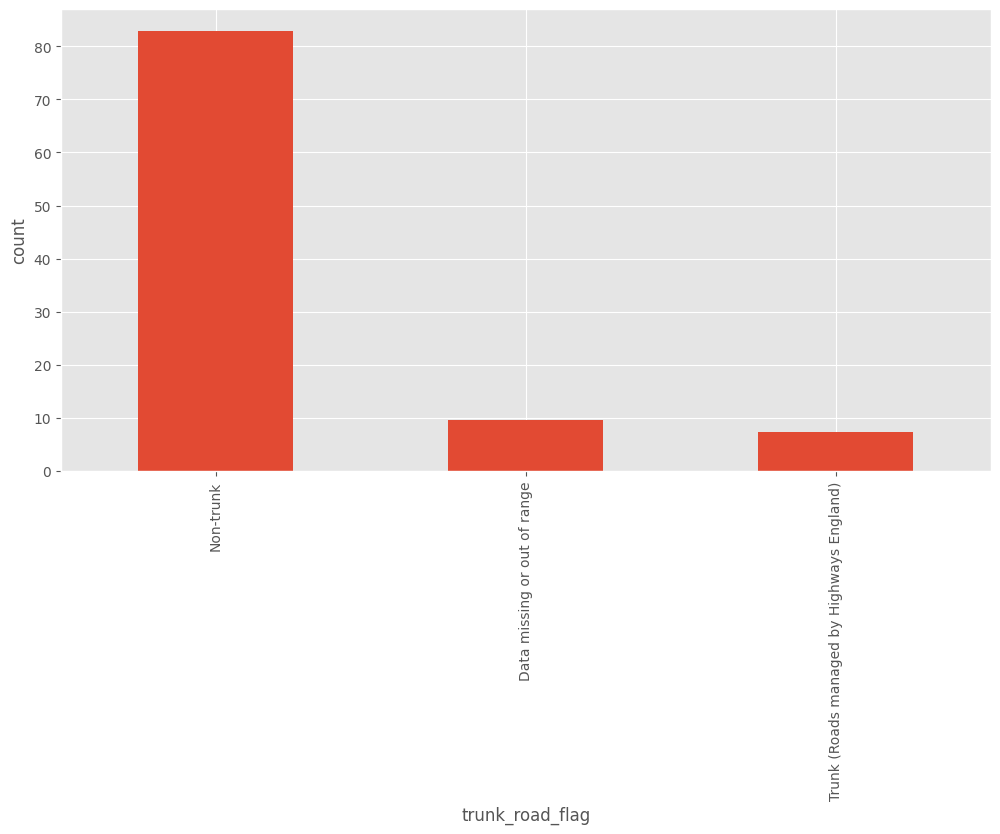

In [33]:
visualize_cols_values_cnt(dataset, 'trunk_road_flag', percentage=True)

I think it might be really missing for no reason (MCAR).

### None instead of NaN

Some of the values are set to the value 'None' instead of NaN

In [34]:
nan_word = 'None'
get_nan_count(dataset, percentage=True, nan_word=nan_word)

special_conditions_at_site    97.546497
carriageway_hazards           98.021534
dtype: float64

Let's look at the the values counts in these columns

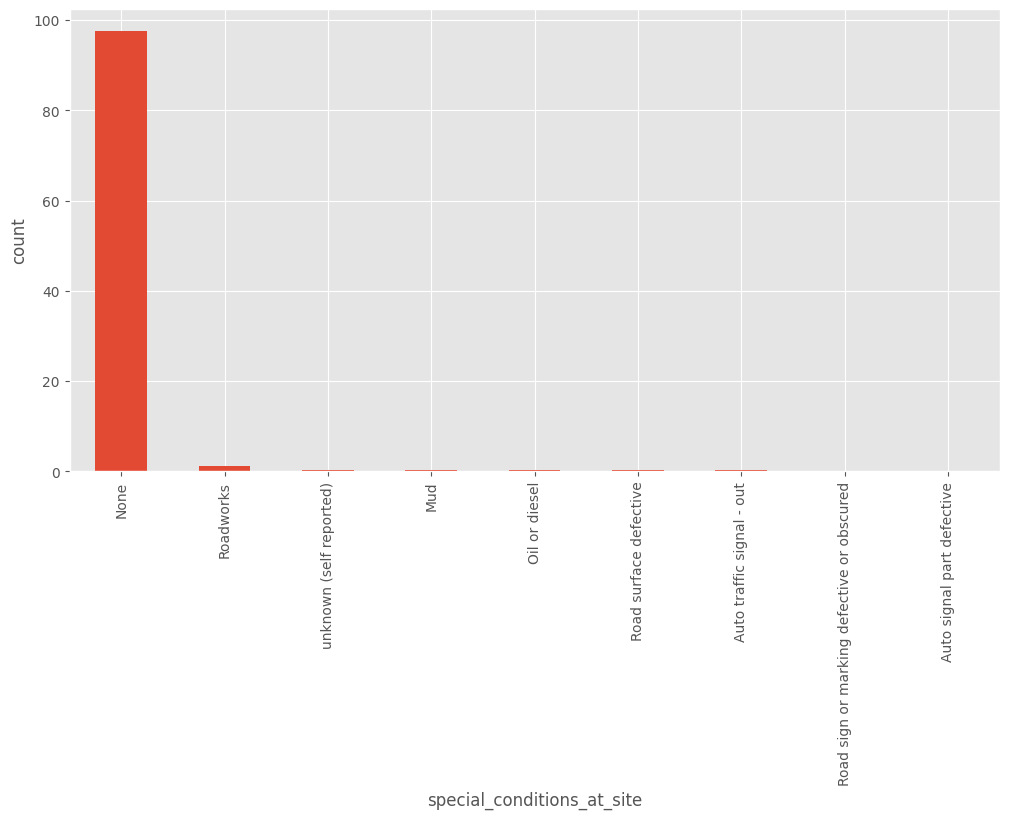

In [35]:
visualize_cols_values_cnt( dataset, 'special_conditions_at_site', percentage=True)

The values here mean that none is means that there were no special conditions at the site.

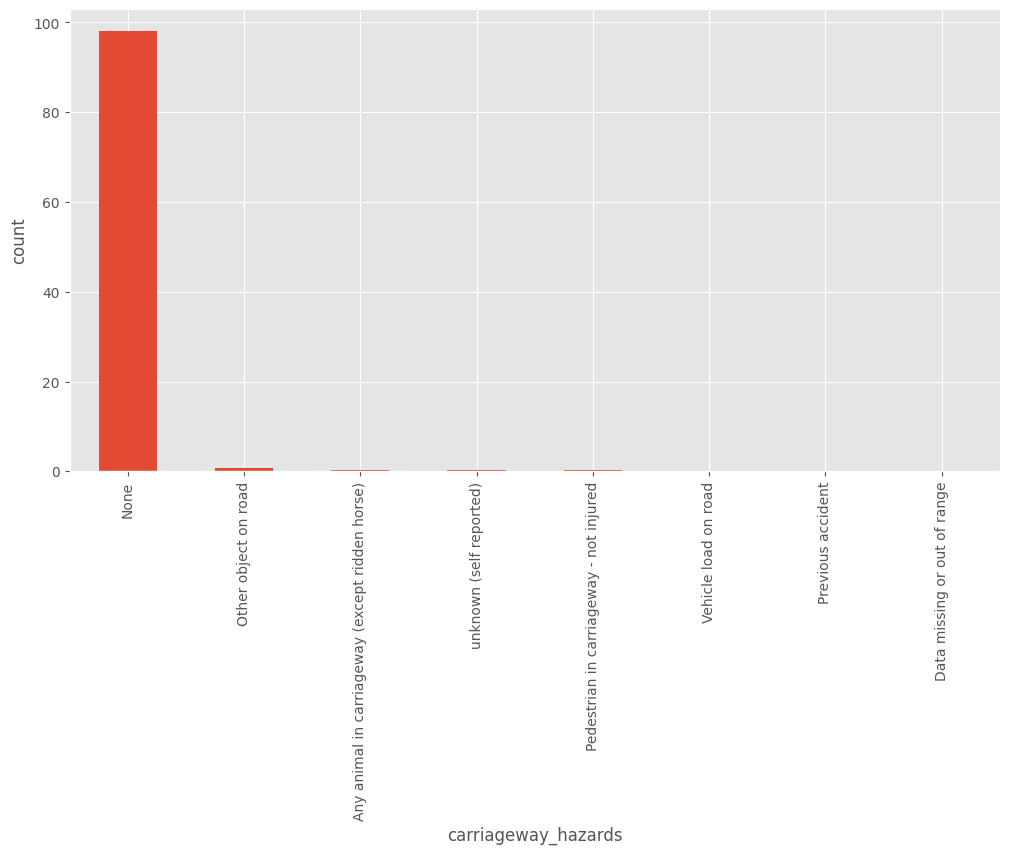

In [36]:
ds_null_junction_cont = dataset[dataset.junction_control == nan_word]
visualize_cols_values_cnt( dataset, 'carriageway_hazards', percentage=True)

The values here mean that none is means that there were no hazards on the road.

This concludes that None is not a missing value keyword

## Handling Missing data

Treat the other missing keywords as NaN

In [37]:
ds_clean = dataset.replace(['Data missing or out of range', 'unknown (self reported)'], np.nan)
get_nan_count(ds_clean, percentage=True)

location_easting_osgr                       0.005124
location_northing_osgr                      0.005124
longitude                                   0.005124
latitude                                    0.005124
road_type                                   1.024733
speed_limit                                 0.027082
junction_detail                             0.077587
junction_control                           41.445312
second_road_number                         41.726382
pedestrian_crossing_human_control           0.135411
pedestrian_crossing_physical_facilities     0.461862
light_conditions                            0.009515
weather_conditions                          2.800448
road_surface_conditions                     0.562871
special_conditions_at_site                  0.369636
carriageway_hazards                         0.399646
trunk_road_flag                             9.711538
dtype: float64

Let's remove all the rows where some values are set to NaN in the columns with less than 1% missing values

In [38]:
def remove_rows_with_nan_less_than(dataset: pd.DataFrame, threshold:float = 0):
    cnt = dataset.isna().sum()
    cnt = cnt[cnt > 0] 
    cnt = cnt * 100 / len(dataset)
    cnt = cnt[cnt < threshold]
    cols = cnt.index.to_list()
    return dataset.dropna(axis='index', subset=cols)
ds_clean = remove_rows_with_nan_less_than(ds_clean, threshold=1)
print(get_nan_count(ds_clean, percentage=True))
print('Removed percentage', (1 - len(ds_clean)/ len(dataset))*100)


road_type              0.834417
junction_control      41.275942
second_road_number    41.751907
weather_conditions     2.337699
trunk_road_flag        9.798676
dtype: float64
Removed percentage 0.9639806471918644


We will handle the MCAR values that has higher percentage than 1% by replacing them with the mode. Because they are categorical and replacing by the mode won't affect much since their % are not much. These are road_type, weather_conditions, trunk_road_flag.

In [39]:
def replace_nan_with_mode(dataset:pd.DataFrame, col_name):
    return dataset[col_name].fillna(dataset[col_name].mode()[0])


for col_name in ['road_type', 'weather_conditions', 'trunk_road_flag']:
    ds_clean[col_name] = replace_nan_with_mode(ds_clean, col_name)

get_nan_count(ds_clean, percentage=True)


junction_control      41.275942
second_road_number    41.751907
dtype: float64

Since the junction control and the second road number are missing from nearly half of the records and their abscense is explained by the value of the junction detail being set to no junction (MAR), I will keep them to avoid the data being biased and I will replace their nan values with a universal "None" that indicates there's no value here.

In [40]:
for col_name in ['junction_control', 'second_road_number']:
    ds_clean[col_name] = ds_clean[col_name].fillna('None')
get_nan_count(ds_clean, percentage=True)


Series([], dtype: float64)

Since the values for the second road class contain -1 to indicate that there's no second road and thus there is no class, we will convert the -1 to None to be consistent with others.

In [41]:
ds_clean.second_road_class = ds_clean.second_road_class.replace('-1', 'None')

### Findings and conclusions

There were not much missing values except for the junction situation. This was handled perfectly to reflect the missing values meaning. Now the dataset has no missing values.

## Handling unclean data

Let's inspect the values of some of the columns and ensure they are in good format.

The indicator features should have typically 2 values (true or false).

In [42]:
ds_clean.nunique()

accident_index                                 135304
accident_year                                       1
accident_reference                             135304
location_easting_osgr                           94221
location_northing_osgr                          96729
longitude                                      129428
latitude                                       128099
police_force                                       51
accident_severity                                   3
number_of_vehicles                                 14
number_of_casualties                               22
date                                              366
day_of_week                                         7
time                                             1440
local_authority_district                          380
local_authority_ons_district                      381
local_authority_highway                           208
first_road_class                                    6
first_road_number           

In [43]:
col_name = 'did_police_officer_attend_scene_of_accident'
ds_clean[col_name].value_counts()

Yes                                                                         103633
No                                                                           30574
No - accident was reported using a self completion  form (self rep only)      1097
Name: did_police_officer_attend_scene_of_accident, dtype: int64

It's more convenient to aggregate the two no options together.

In [44]:
ds_clean[col_name] = ds_clean[col_name].replace('No - accident was reported using a self completion  form (self rep only)', 'No')
ds_clean[col_name].value_counts()

Yes    103633
No      31671
Name: did_police_officer_attend_scene_of_accident, dtype: int64

In [45]:
# for col_name in ['day_of_week', 'first_road_class', 'second_road_class', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 
# 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions',
# 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'trunk_road_flag']:
#     print(ds_clean[col_name].value_counts())
#     print('-----------------------------------')

I looked at all the distinct values and they are all clean now.
I commented it to decrease the long scroll the notebook.

## Handling duplicate and useless data

In [46]:
ds_clean.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,Metropolitan Police,Slight,2,1,01/11/2016,Tuesday,02:30,Brent,Brent,Brent,A,4006,Single carriageway,30.0,Not at junction or within 20 metres,None,None,None,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights unlit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000543
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,Metropolitan Police,Slight,1,1,01/11/2016,Tuesday,00:37,Bexley,Bexley,Bexley,A,207,Single carriageway,30.0,Other junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000375
2,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,Metropolitan Police,Slight,1,1,01/11/2016,Tuesday,01:25,Hillingdon,Hillingdon,Hillingdon,A,4020,Roundabout,30.0,Roundabout,Give way or uncontrolled,A,4020.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01033725
3,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,Metropolitan Police,Slight,1,1,01/11/2016,Tuesday,09:15,Merton,Merton,Merton,A,217,Single carriageway,30.0,T or staggered junction,Auto traffic signal,A,217.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003379
4,2016010000018,2016,010000018,510740.0,177230.0,-0.406580,51.483139,Metropolitan Police,Slight,2,1,01/11/2016,Tuesday,07:53,Hounslow,Hounslow,Hounslow,A,312,Dual carriageway,40.0,Not at junction or within 20 metres,None,None,None,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002583


The accident index and reference are both unique and identify an accident. We can remove the accident index because it's useless.

Let's also remove the accident year since all the values are 2016 and storing all of them would be a waste of memory.

In [47]:
ds_clean = ds_clean.drop(['accident_index', 'accident_year'], axis=1)
ds_clean.columns


Index(['accident_reference', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week',
       'time', 'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

Let's see if there are duplicate values

In [48]:
print('all columns', ds_clean.duplicated().sum())
print('accident reference', ds_clean.duplicated(['accident_reference']).sum())
all_cols_except_ref = ds_clean.columns.to_list()
all_cols_except_ref.remove('accident_reference')
print('all except reference', ds_clean.duplicated(all_cols_except_ref).sum())

all columns 0
accident reference 0
all except reference 6


If we compared all the feature values for duplicates we will not find any. If we consider all the values except the reference, there exist 6 duplicate values which shall be removed.

In [49]:
ds_clean = ds_clean.drop_duplicates(all_cols_except_ref)
print('all except reference', ds_clean.duplicated(all_cols_except_ref).sum())


all except reference 0


## Observing outliers

There are only a couple of numerical features that might contain outliers. Let's have a look at some of their stats.

In [50]:
ds_clean.describe()

,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit
count,135298.000000,1.352980e+05,135298.000000,135298.000000,135298.000000,135298.000000,135298.000000
mean,448278.298216,2.887785e+05,-1.311062,52.486391,1.849111,1.329332,37.984967
std,95383.289072,1.575378e+05,1.401275,1.418685,0.710392,0.791406,14.061562
min,76702.000000,1.107500e+04,-7.389809,49.919716,1.000000,1.000000,20.000000
25%,385850.250000,1.763200e+05,-2.212812,51.473065,1.000000,1.000000,30.000000
50%,453622.500000,2.380975e+05,-1.209135,52.029078,2.000000,1.000000,30.000000
75%,527457.000000,3.903335e+05,-0.162852,53.407116,2.000000,1.000000,40.000000
max,655256.000000,1.178623e+06,1.757858,60.490191,16.000000,58.000000,70.000000


The number of vehicles ranges from [1:16] which is reasonable range for cars involved in an accident. A range of [1:58] is also okay for the number of casualties. 

The speed limit is already categorized into a couple of values in range [20:70] which indicates no outliers.

,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
75626,34NE09806,504003.0,290817.0,-0.469132,52.505308,Northamptonshire,Serious,2,58,14/07/2016,Thursday,15:58,East Northamptonshire,East Northamptonshire,Northamptonshire,C,first_road_class is C or Unclassified. These r...,Single carriageway,60.0,Crossroads,Give way or uncontrolled,C,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Rural,Yes,Non-trunk,E01027044


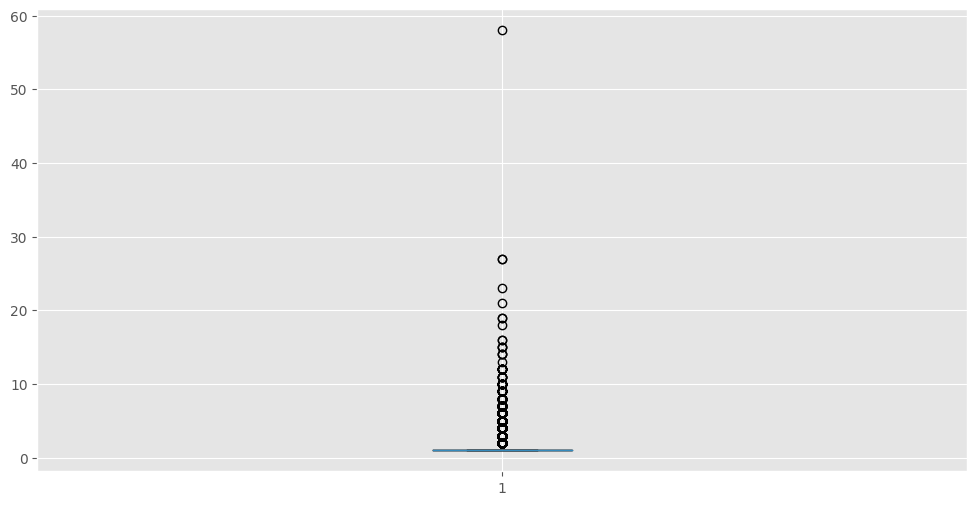

In [51]:
plt.boxplot(ds_clean.number_of_casualties)
ds_clean[ds_clean.number_of_casualties == 58]


Although there are many outliers according to the box plot. Looking at the accident info of the furthest point with 58 casualities makes sense as the severity is high.

To check the location outliars, I researched the uk min and max longitude [-8.62 : 1.77] and latitude [49.9 : 60.84] (src: https://gis.stackexchange.com/questions/152758/countries-latitude-and-longitude-range). Looking and the min and max of the values in the dataset implies that there are no outliers.

# 4 - Data transformation

## 4.1 - Discretization

## 4.11 - Findings and conclusions

## 4.2 - Encoding

## 4.22 - Findings and conlcusions

## 4.3 - Normalisation 

## 4.31 - Findings and conclusions

## 4.4 - Adding more columns

## 4.41 - Findings and concluisons

## 4.5 - Csv file for lookup

## 5- Exporting the dataframe to a csv file or parquet